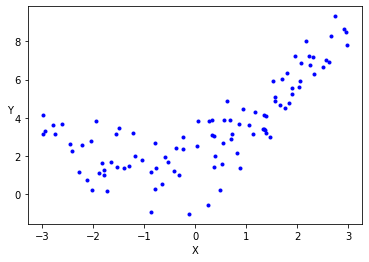

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

plt.plot(X,y,'b.')
plt.ylabel('Y',fontsize=10,rotation=0)
plt.xlabel('X',fontsize=10)
plt.show()

#### 다항회귀

In [ ]:
#PolynomialFeatures()를 사용해서 2차항 변수 만들기
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[2.56850184]
[2.56850184 6.59720171]


#### 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.03478022]), array([[ 0.00232119, -0.01442857]]))

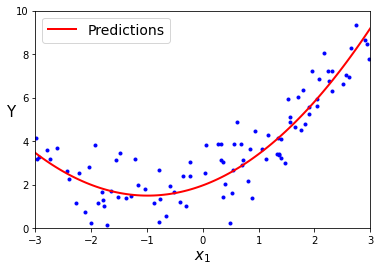

In [ ]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-',linewidth=2,label='Predictions')
plt.xlabel('$x_1$',fontsize=15)
plt.ylabel('Y',fontsize=15,rotation=0)
plt.legend(loc='upper left',fontsize=14)
plt.axis([-3,3,0,10])
plt.show()

#### 고차 다항 회귀

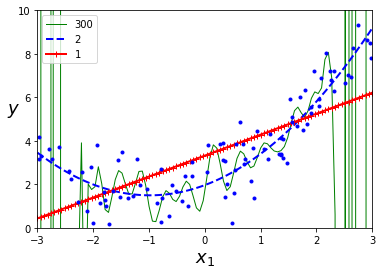

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-',1,300),('b--',2,2),('r-+',2,1)):
  polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler=StandardScaler()
  lin_reg=LinearRegression()
  polynomial_regression=Pipeline([
    ('poly_features',polybig_features),
    ('std_scaler',std_scaler),
    ('lin_reg',lin_reg),
  ])
  polynomial_regression.fit(X,y)
  y_newbig=polynomial_regression.predict(X_new)
  plt.plot(X_new,y_newbig,style,label=str(degree),linewidth=width)

plt.plot(X,y,'b.',linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [52]:
# ﻿모델의 학습 곡선을 그리는 함수 정의﻿
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=10)
  train_errors,val_errors=[],[]
# 훈련 세트가 1개일때부터 전체 개수일때까지 검증
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict=model.predict(X_train[:m])
    y_val_predict=model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')
  plt.legend(loc='upper right',fontsize=14)
  plt.xlabel('Trainig set size',fontsize=14)
  plt.ylabel('RMSE',fontsize=4)

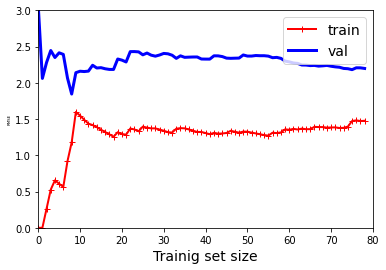

In [53]:
# 단순 선형 회귀 모델의 학습 곡선
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.axis([0,80,0,3])
plt.show()

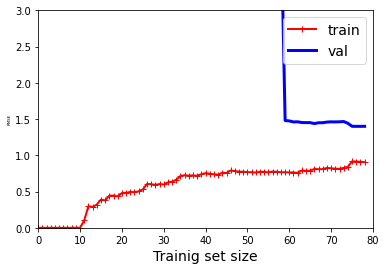

In [54]:
#10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])
plot_learning_curves(polynomial_regression,X,y)
plt.axis([0,80,0,3])
plt.show()

두 학습 곡선의 차이
- 10차 다항 회귀 모델을 보면 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
- 10차 다항 회귀 모델의 훈련 데이터와 검증 데이터의 두 곡선 사이에 공간이 존재한다.(과대적합의 특징) but, 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.